In [27]:
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

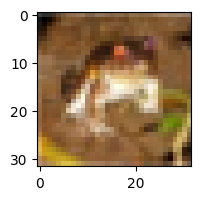

In [30]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

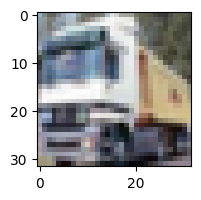

In [31]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [33]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [34]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[1]


'automobile'

In [36]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

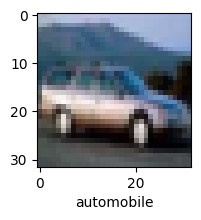

In [37]:
plot_sample(X_train,y_train,4)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [38]:
X_test=X_test/255.0
X_train=X_train/255.0

#Perform Artifical Neural Network

In [39]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.8128 - accuracy: 0.3554
Epoch 2/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6223 - accuracy: 0.4286
Epoch 3/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5432 - accuracy: 0.4546
Epoch 4/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4832 - accuracy: 0.4797
Epoch 5/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4343 - accuracy: 0.4951
Epoch 6/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3925 - accuracy: 0.5101
Epoch 7/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.3519 - accuracy: 0.5230
Epoch 8/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.3191 - accuracy: 0.5365
Epoch 9/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.2843 - accuracy: 0.5484
Epoch 10/10
1563/1563 [==============================] 

Test on X_test data

In [42]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.3756 - accuracy: 0.5069


[1.3755942583084106, 0.5069000124931335]

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.53      0.56      1000
           1       0.69      0.56      0.62      1000
           2       0.42      0.40      0.41      1000
           3       0.42      0.27      0.33      1000
           4       0.44      0.45      0.44      1000
           5       0.56      0.22      0.32      1000
           6       0.41      0.75      0.53      1000
           7       0.65      0.52      0.58      1000
           8       0.47      0.80      0.59      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.50     10000
weighted avg       0.52      0.51      0.50     10000



#Apply CNN module

In [66]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(64,(3,3),1,activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),1,activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(16,(3,3),1,activation='relu'),
    layers.MaxPool2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 2, 2, 16)         

In [71]:
val = X_test, y_test

In [72]:
logdir='logs'
tensorboard_call_back=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=cnn.fit(X_train,y_train, validation_data=val,epochs=20,callbacks=[tensorboard_call_back])


Epoch 1/20
1563/1563 [==============================] - 87s 55ms/step - loss: 1.7025 - accuracy: 0.3703 - val_loss: 1.4487 - val_accuracy: 0.4655
Epoch 2/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3892 - accuracy: 0.4986 - val_loss: 1.3393 - val_accuracy: 0.5169
Epoch 3/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.2761 - accuracy: 0.5428 - val_loss: 1.2416 - val_accuracy: 0.5449
Epoch 4/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1998 - accuracy: 0.5724 - val_loss: 1.1782 - val_accuracy: 0.5773
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1386 - accuracy: 0.5958 - val_loss: 1.1564 - val_accuracy: 0.5896
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0979 - accuracy: 0.6113 - val_loss: 1.1273 - val_accuracy: 0.6094
Epoch 7/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0579 - accuracy: 0.6249 - val_loss: 1.0699 -

Plot Performs

In [73]:
#Plot Performs
hist.history

{'loss': [1.702500343322754,
  1.3892029523849487,
  1.2760635614395142,
  1.1998069286346436,
  1.138640284538269,
  1.0978896617889404,
  1.057923436164856,
  1.0249427556991577,
  0.9953954815864563,
  0.9710246324539185,
  0.9524247050285339,
  0.9349994659423828,
  0.9152493476867676,
  0.8977981209754944,
  0.8868128657341003,
  0.874224841594696,
  0.8617566227912903,
  0.8495567440986633,
  0.8400131464004517,
  0.8312269449234009],
 'accuracy': [0.3702999949455261,
  0.49862000346183777,
  0.5427799820899963,
  0.5724400281906128,
  0.5957800149917603,
  0.6112800240516663,
  0.6248599886894226,
  0.6384999752044678,
  0.6470999717712402,
  0.6546000242233276,
  0.6625999808311462,
  0.6723799705505371,
  0.6739599704742432,
  0.6815199851989746,
  0.6859400272369385,
  0.6908400058746338,
  0.6923999786376953,
  0.6980199813842773,
  0.7006999850273132,
  0.7048199772834778],
 'val_loss': [1.4487298727035522,
  1.3392645120620728,
  1.2415907382965088,
  1.178242802619934,
  

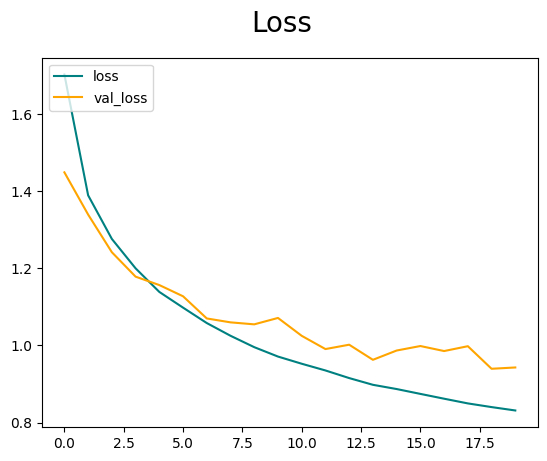

In [75]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

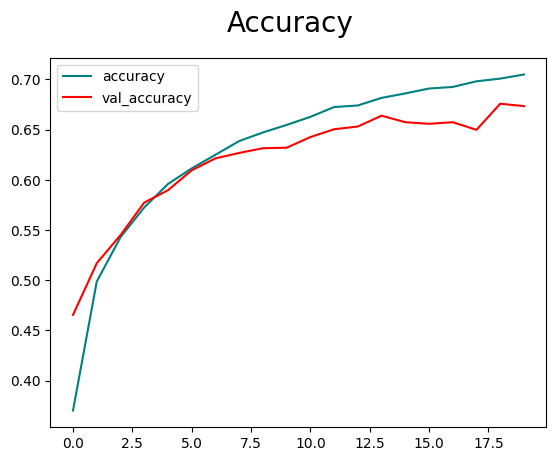

In [77]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluate performas

In [73]:
#Evaluate
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
ac=BinaryAccuracy()

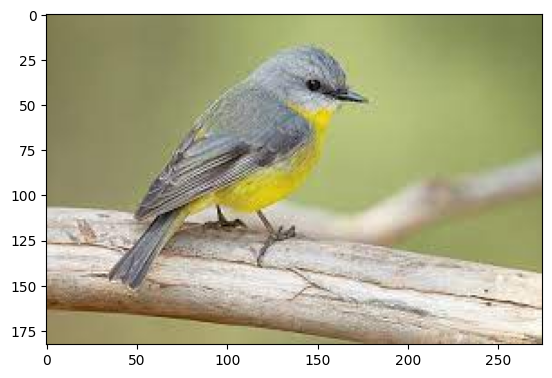

In [82]:
import cv2
img=cv2.imread('/content/drive/MyDrive/bird.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [83]:
import numpy

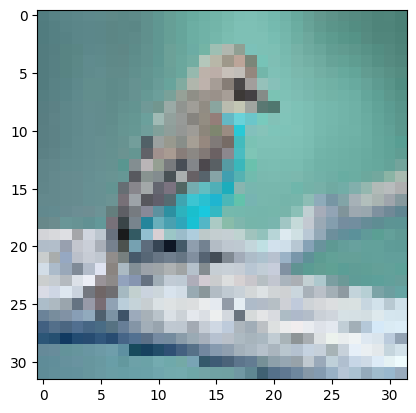

In [84]:
resize=tf.image.resize(img,(32,32))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
resize.shape

TensorShape([32, 32, 3])

In [87]:
np.expand_dims(resize,0).shape

(1, 32, 32, 3)

In [90]:
yhat= cnn.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 145ms/step


array([[0.07379234, 0.00120981, 0.8446397 , 0.05027104, 0.00201801,
        0.00918063, 0.00814416, 0.00245301, 0.00638654, 0.00190468]],
      dtype=float32)

#Save the model

In [94]:
import os

In [95]:
from tensorflow.keras.models import load_model
cnn.save(os.path.join('models','CNN.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
#reload
new_model=load_model(os.path.join('models','CNN.h5'))

In [97]:
new_model